Objectif :

- Réaliser un test ANOVA pour déterminer si des différences significatives existent dans les moyennes de la variable "grav" parmi les différentes catégories de chaque variable catégorielle.

In [ ]:
# Import des packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [ ]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

In [ ]:
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving fusion_def_clean.csv to fusion_def_clean.csv


In [ ]:
fusion_clean = pd.read_csv(io.BytesIO(uploaded["fusion_def_clean.csv"]), low_memory=False)
fusion_clean.head(10)

,Unnamed: 0,num_acc,mois,jour,lum,agg,int,atm,col,com,...,actp,etatp,an_nais,secuUn,secuDeux,an_naiss,age_acc,age_acc_seconds,age_acc_an,tranches_ages
0,0,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1976-01-01,Ceinture,Ceinture,1976-01-01,10593 days,9.152352e+08,29.021918,23-31
1,1,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1968-01-01,Ceinture,Ceinture,1968-01-01,13515 days,1.167696e+09,37.027397,32-40
2,2,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1964-01-01,Ceinture,Ceinture,1964-01-01,14976 days,1.293926e+09,41.030137,41-50
3,3,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,2004-01-01,Dispositif enfants,Ceinture,2004-01-01,366 days,3.162240e+07,1.002740,0-11
4,4,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1998-01-01,Ceinture,Ceinture,1998-01-01,2557 days,2.209248e+08,7.005479,0-11
5,5,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1991-01-01,Ceinture,Ceinture,1991-01-01,5114 days,4.418496e+08,14.010959,12-22
6,6,200500000002,1,21,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,...,0,Non renseigné,1955-01-01,Ceinture,Ceinture,1955-01-01,18263 days,1.577923e+09,50.035616,50+
7,7,200500000002,1,21,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,...,0,Non renseigné,1979-01-01,Casque,Ceinture,1979-01-01,9497 days,8.205408e+08,26.019178,23-31
8,8,200500000003,1,21,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,...,0,Non renseigné,1983-01-01,Casque,Ceinture,1983-01-01,8036 days,6.943104e+08,22.016438,12-22
9,9,200500000003,1,21,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,...,0,Non renseigné,1956-01-01,Casque,Ceinture,1956-01-01,17898 days,1.546387e+09,49.035616,41-50


In [ ]:
# Nombre de lignes et de colonnes dans le dataframe
fusion_clean.shape

(2192779, 48)

In [ ]:
fusion_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192779 entries, 0 to 2192778
Data columns (total 48 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   num_acc             int64  
 2   mois                int64  
 3   jour                int64  
 4   lum                 object 
 5   agg                 object 
 6   int                 object 
 7   atm                 object 
 8   col                 object 
 9   com                 object 
 10  dep                 object 
 11  annee_x_x           int64  
 12  date                object 
 13  jour_de_la_semaine  int64  
 14  heure               int64  
 15  catr                object 
 16  circ                object 
 17  nbv                 float64
 18  vosp                object 
 19  prof                object 
 20  plan                object 
 21  surf                object 
 22  infra               object 
 23  situ                object 
 24  senc                obje

In [ ]:
fusion_clean.dtypes

Unnamed: 0              int64
num_acc                 int64
mois                    int64
jour                    int64
lum                    object
agg                    object
int                    object
atm                    object
col                    object
com                    object
dep                    object
annee_x_x               int64
date                   object
jour_de_la_semaine      int64
heure                   int64
catr                   object
circ                   object
nbv                   float64
vosp                   object
prof                   object
plan                   object
surf                   object
infra                  object
situ                   object
senc                   object
obs                    object
obsm                   object
choc                   object
manv                   object
num_veh                object
catv_Label             object
permis                 object
place                 float64
catu      

In [ ]:
# Vérification du format date pour la variable annee
display(fusion_clean.annee_x_x.head())
display(fusion_clean.annee_x_x.tail())

0    2005
1    2005
2    2005
3    2005
4    2005
Name: annee_x_x, dtype: int64

2192774    2021
2192775    2021
2192776    2021
2192777    2021
2192778    2021
Name: annee_x_x, dtype: int64

In [ ]:
fusion_clean["annee_x_x"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2021])

In [ ]:
# Vérification du format date pour la variable mois
display(fusion_clean.mois.head())
display(fusion_clean.mois.tail())

0    1
1    1
2    1
3    1
4    1
Name: mois, dtype: int64

2192774    1
2192775    1
2192776    1
2192777    1
2192778    1
Name: mois, dtype: int64

In [ ]:
fusion_clean["mois"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# Vérification du format date pour la variable jour
display(fusion_clean.jour.head())
display(fusion_clean.jour.tail())

0    12
1    12
2    12
3    12
4    12
Name: jour, dtype: int64

2192774    1
2192775    1
2192776    1
2192777    2
2192778    2
Name: jour, dtype: int64

In [ ]:
fusion_clean["jour"].unique()

array([12, 21,  4, 10, 28,  3, 18, 25, 29, 23, 11,  1, 30, 19,  9, 31, 15,
       13, 26,  2,  6,  8, 20, 16,  7,  5, 24, 14, 17, 22, 27])

In [ ]:
fusion_clean["heure"].unique()

array([19, 16, 18, 14, 15, 21, 17, 20,  2,  6,  8,  7, 11,  9, 10,  0, 22,
        5, 23, 12, 13,  3,  4,  1])

In [ ]:
# Statistiques descriptives
fusion_clean.describe()

,Unnamed: 0,num_acc,mois,jour,annee_x_x,jour_de_la_semaine,heure,nbv,place,age_acc_seconds,age_acc_an
count,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06,2.192779e+06
mean,1.096389e+06,2.011149e+11,6.645909e+00,1.562099e+01,2.011149e+03,2.995248e+00,1.366874e+01,2.118393e+00,1.307749e+00,1.180619e+09,3.743718e+01
std,6.330009e+05,4.253833e+08,3.392712e+00,8.737417e+00,4.253880e+00,1.941433e+00,5.340560e+00,1.528167e+00,1.029102e+00,5.724306e+08,1.815166e+01
min,0.000000e+00,2.005000e+11,1.000000e+00,1.000000e+00,2.005000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.481945e+05,2.007001e+11,4.000000e+00,8.000000e+00,2.007000e+03,1.000000e+00,1.000000e+01,2.000000e+00,1.000000e+00,7.258464e+08,2.301644e+01
50%,1.096389e+06,2.011000e+11,7.000000e+00,1.600000e+01,2.011000e+03,3.000000e+00,1.500000e+01,2.000000e+00,1.000000e+00,1.073002e+09,3.402466e+01
75%,1.644584e+06,2.015000e+11,1.000000e+01,2.300000e+01,2.015000e+03,5.000000e+00,1.800000e+01,2.000000e+00,1.000000e+00,1.546387e+09,4.903562e+01
max,2.192778e+06,2.021001e+11,1.200000e+01,3.100000e+01,2.021000e+03,6.000000e+00,2.300000e+01,9.900000e+01,1.000000e+01,2.840227e+09,9.006301e+01


In [ ]:
# Repérage des éventuelles lignes en doublon :
fusion_clean.duplicated().sum()

0

<ipython-input-18-44d9f72dc7b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fusion_clean.corr().round(2)  # Arrondir les valeurs à deux décimales


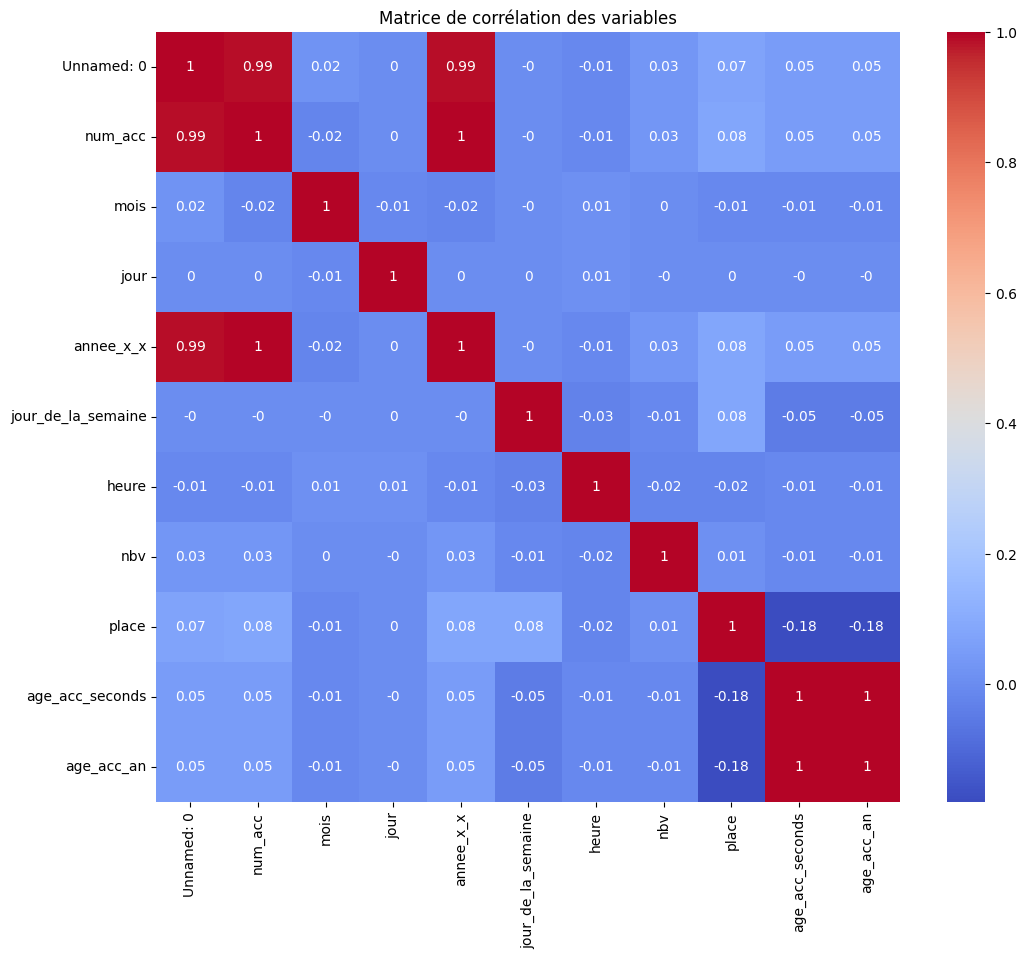

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = fusion_clean.corr().round(2)  # Arrondir les valeurs à deux décimales

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables")
plt.show()

<ipython-input-127-c1abf3270486>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


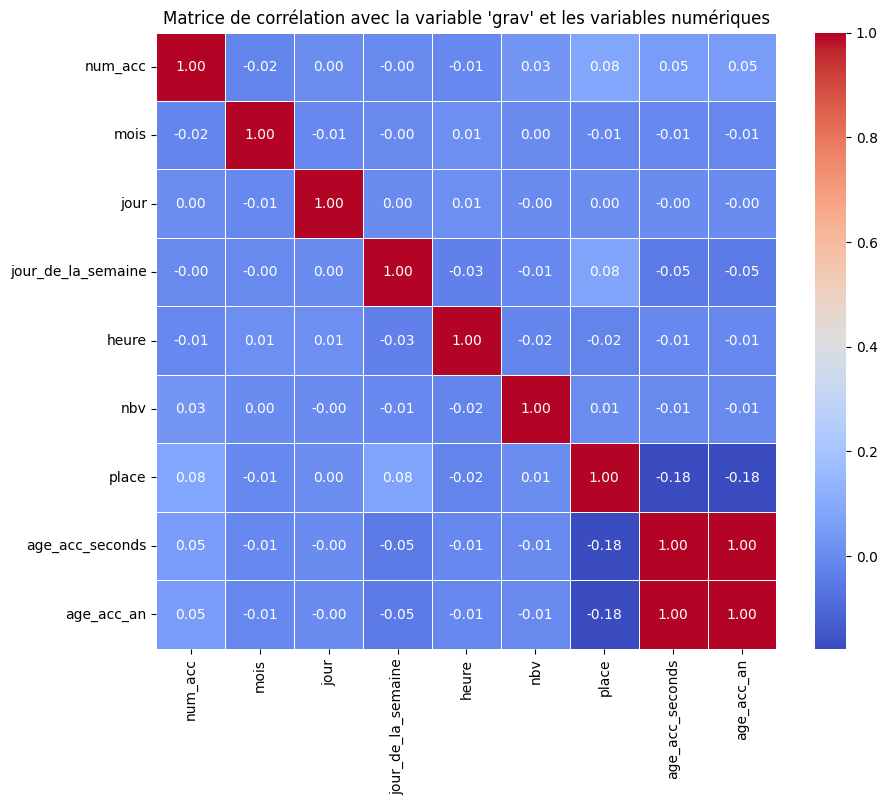

In [ ]:
# Sélection des variables numériques pour la matrice de corrélation
numeric_vars = ['num_acc', 'mois', 'jour', 'jour_de_la_semaine', 'heure', 'nbv', 'place', 'age_acc_seconds', 'age_acc_an']

# Convertion des variables sélectionnées en valeurs numériques
numeric_data = fusion_clean[['grav'] + numeric_vars].copy()
numeric_data[numeric_vars] = numeric_data[numeric_vars].apply(pd.to_numeric, errors='coerce')

# Calcul de la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Création de la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Matrice de corrélation avec la variable 'grav' et les variables numériques")
plt.show()


# **Test ANOVA visant à évaluer l'existence de différences significatives dans les moyennes de la variable "grav" entre les diverses catégories de chaque variable catégorielle.**

In [ ]:
# Créer un DataFrame avec les variables appropriées pour l'analyse de corrélation
selected_data = fusion_clean[['grav', 'num_acc', 'mois', 'jour', 'jour_de_la_semaine', 'heure', 'nbv', 'place', 'age_acc_seconds', 'age_acc_an',
                             'lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',
                             'obs', 'obsm', 'choc', 'manv', 'catv_Label', 'permis', 'catu', 'sexe', 'trajet', 'locp', 'actp', 'etatp',
                             'an_nais', 'secuUn', 'secuDeux', 'an_naiss', 'tranches_ages']]

# Convertion des variables catégorielles en chaînes de caractères
variables_catégorielles = ['grav', 'lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',
                           'obs', 'obsm', 'choc', 'manv', 'catv_Label', 'permis', 'catu', 'sexe', 'trajet', 'locp', 'actp', 'etatp',
                           'an_nais', 'secuUn', 'secuDeux', 'an_naiss', 'tranches_ages']

for var in variables_catégorielles:
    selected_data[var] = selected_data[var].astype(str)

# Création d'un DataFrame contenant uniquement les variables catégorielles et "grav"
data_catégorielles = selected_data[variables_catégorielles].copy()

# Convertion de la variable cible 'grav' en une série
série_gravité = data_catégorielles['grav']

# Suppression de la variable 'grav' de data_catégorielles pour s'assurer que seules les variables catégorielles restent
data_catégorielles = data_catégorielles.drop('grav', axis=1)

# Application de l'ANOVA pour chaque variable catégorielle
for var in data_catégorielles.columns.tolist():
    # Création d'une table de contingence pour "grav" et la variable catégorielle actuelle
    table_contingence = pd.crosstab(série_gravité, data_catégorielles[var])

    # Application de l'ANOVA
    statistique_F, valeur_p = stats.f_oneway(*[table_contingence[col] for col in table_contingence.columns])

    # Affichage du résultat de l'ANOVA pour la variable catégorielle actuelle
    print("Résultat de l'ANOVA pour la variable catégorielle '{}':".format(var))
    print("Statistique F =", statistique_F)
    print("Valeur p =", valeur_p)
    print()





<ipython-input-131-7fefc11b1c14>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[var] = selected_data[var].astype(str)


ANOVA result for the categorical variable 'lum':
F-statistic = 5.915649939400401
p-value = 0.004607122463436838

ANOVA result for the categorical variable 'agg':
F-statistic = 1.2890383353519088
p-value = 0.2995343615910299

ANOVA result for the categorical variable 'int':
F-statistic = 8.258408179813243
p-value = 1.3376089918331384e-05

ANOVA result for the categorical variable 'atm':
F-statistic = 7.83520118460214
p-value = 7.694476591819332e-06

ANOVA result for the categorical variable 'col':
F-statistic = 3.4738537871413717
p-value = 0.010321773795376358

ANOVA result for the categorical variable 'catr':
F-statistic = 5.228051323939453
p-value = 0.0010084100383082441

ANOVA result for the categorical variable 'circ':
F-statistic = 6.397805370627458
p-value = 0.003277040335518708

ANOVA result for the categorical variable 'vosp':
F-statistic = 8.272959178115414
p-value = 0.0009880549157575429

ANOVA result for the categorical variable 'prof':
F-statistic = 6.560039027236189
p-value

Les résultats sont présentés sous forme de statistiques F et de valeurs p.

La statistique F mesure la variance entre les groupes par rapport à la variance au sein des groupes.
Une valeur de F élevée indique des différences significatives entre les moyennes des groupes.

La valeur p est la probabilité d'observer ces différences si l'hypothèse nulle est vraie.
Une valeur p faible (généralement inférieure à 0,05) indique que les différences sont statistiquement significatives.

Quelques conclusions possibles :

- Les variables "lum", "int", "atm", "col", "catr", "vosp", "prof", "plan", "surf", "infra", "situ", "obs", "obsm", "choc", "manv", "catv_Label", "permis", "locp", "actp", "etatp", "an_nais", "secuUn", "secuDeux", "an_naiss" ont des valeurs de p très faibles (inférieures à 0,05), ce qui suggère qu'il y a des différences significatives dans la gravité des accidents entre les différentes catégories de ces variables.

- Les variables "agg", "circ", "sexe" et "trajet" ont des valeurs de p élevées (supérieures à 0,05), ce qui indique que les différences dans la gravité des accidents entre les catégories de ces variables ne sont pas statistiquement significatives.

En résumé, ces résultats suggèrent que certaines caractéristiques, telles que les conditions atmosphériques, le type d'intersection, la catégorie de route, la déclivité de la route, le type d'obstacle heurté, etc., sont fortement associées à la gravité des accidents, tandis que d'autres caractéristiques, telles que l'agrégat ou le sexe, ont moins d'impact sur la gravité des accidents.